In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from itertools import combinations



C:\Users\Keagan\AppData\Local\Temp\ipykernel_32752\1579323462.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', len(unique_comms))


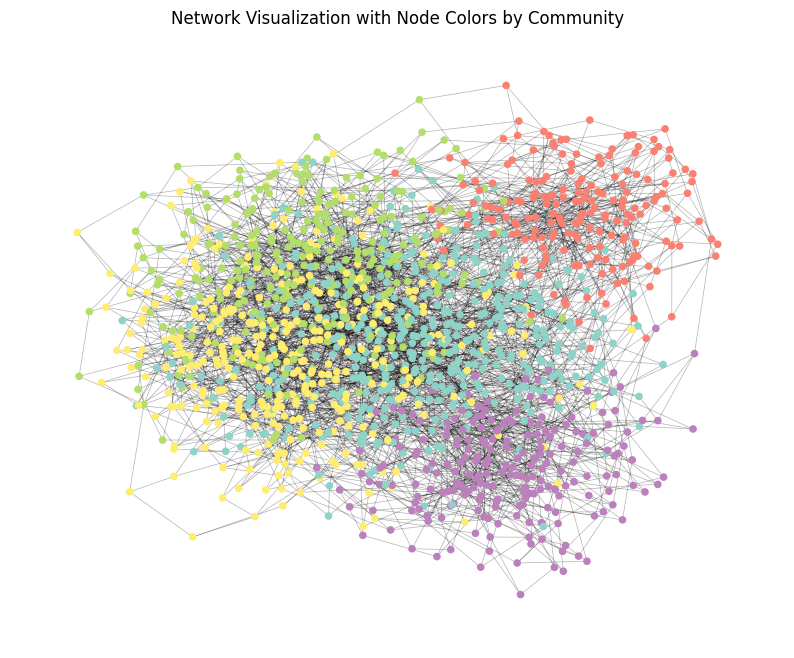

In [18]:

edges = np.loadtxt('network.dat', dtype=int)
G = nx.Graph()
G.add_edges_from(edges - 1)  # Shift node IDs to start at 0

# Load community data (node_id, community_id) and shift IDs to 0-based
community_data = np.loadtxt('community.dat', dtype=int)
community_data -= 1
node_community_map = {node: comm for node, comm in community_data}

# Normalize community IDs to start from 0 for colormap indexing
unique_comms = np.unique(community_data[:, 1])
comm_id_map = {old: new for new, old in enumerate(unique_comms)}
normalized_node_community_map = {node: comm_id_map[comm] for node, comm in node_community_map.items()}

# Generate layout and assign pastel colors
pos = nx.spring_layout(G, seed=42)
cmap = cm.get_cmap('Set3', len(unique_comms))
node_colors = [cmap(normalized_node_community_map[node]) for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
plt.title("Network Visualization with Node Colors by Community")
plt.axis('off')
plt.show()

In [8]:
triplets_df = None

###### Your code starts here ######

triplets = []
for i in sorted(G.nodes()):
    for j in G.neighbors(i):
        if j <= i:
            continue
        for k in G.neighbors(i):
            if k <= j:
                continue
            # check if j and k are also connected
            if G.has_edge(j, k):
                triplets.append((i, j, k))

triplets_df = pd.DataFrame(triplets, columns=['i', 'j', 'k'])
###### Your code ends here ######

triplets_df

,i,j,k
0,15,1412,1452
1,25,1280,1468
2,34,907,1149
3,54,450,1090
4,59,1348,1401
5,115,1341,1419
6,284,887,1315
7,302,1340,1456
8,384,512,1415
9,384,1089,1415
